<font size="+3"><b>PCA and Clustering
</b></font>

***
***

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [15]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-04 00:24:22--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-04 00:24:23 (108 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [16]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

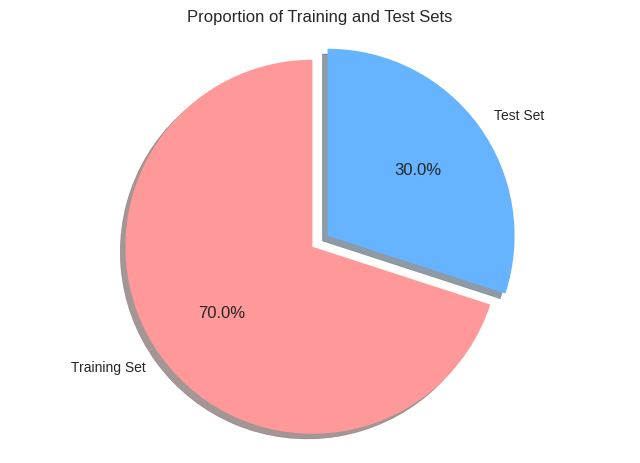

Number of entries in Training Set: 147
Number of entries in Test Set: 63


In [17]:
# 1.1
# Add necessary code here.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into X and y
X = data.drop(columns=['Type'])
y = data['Type']

# Stratified split of X and y into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Plot Train and Test Proportions in a Pie Chart
train_size = len(X_train)
test_size = len(X_test)

labels = ['Training Set', 'Test Set']
sizes = [train_size, test_size]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Proportion of Training and Test Sets')
plt.show()

print(f"Number of entries in Training Set: {train_size}")
print(f"Number of entries in Test Set: {test_size}")


<font color='Green'><b>Answer:</b></font>

- **1.1** </br>

Results:

Number of entries in Training Set: 147
</br>
Number of entries in Test Set: 63

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2** </br>

For this dataset, StandardScaler would be a good choice for a scaler given the geometric parameters of this dataset. StandardScaler standardizes features by centering them around zero and scaling them to have unit variance. This ensures that each feature has a mean of 0 and a standard deviation of 1.StandardScaler has multiple advantages such as being able to handle different scales, preventing distribution shape, and is effective with the SVM model. Explanations are provided below:

</br>

**Handling Different Scales:** The dataset contains geometric parameters such as area, perimeter, length, and width, which may have different scales. StandardScaler handles features with different scales by scaling them to a standard range ensuring that no single feature can dominate the learning process.

</br>

**Preserving Distribution Shape:** StandardScaler preserves the shape of the original distribution of the data, which is important for algorithms like Support Vector Machines that assume that the features are centered around zero and have similar variances.

</br>

**Effectiveness with SVM:** SVMs are sensitive to the scale of features, and using features with varying scales can lead to lower performance. StandardScaler ensures that the data is properly scaled thus improving performance of the SVM model.

</br>

StandardScaler is a suitable choice for scaling the data in this scenario due to its effectiveness in handling features with different scales while preserving the distribution shape, which aligns well with the requirements of the SVM algorithm.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [18]:
# 1.3
# Add necessary code here.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Calculating accuracy of SVM classifer
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy:.2f}")





Accuracy of SVM classifier: 0.84


<font color='Green'><b>Answer:</b></font>

- **1.3** </br>


A suitable machine learning model for the wheat kernels dataset would be a Support Vector Machine (SVM). This is due to multiple factors. SVM is great at handling non-linear data, handling multivariate data, and supports classification tasks. More deatails are explained below:

</br>


**SVM's Ability to Handle Non-Linear Data:** SVM models are effective in handling non-linear data by using kernel functions to map the input space into a higher-dimensional feature space. Since the geometric parameters of wheat kernels might not exhibit linear separability, SVMs can effectively capture non-linear decision boundaries.

</br>

**Handling Multivariate Data:** This dataset contains multiple geometric parameters (also known as multivariate data) for each wheat kernel. SVM models have an ability to handle multivariate data effectively.

</br>

**Overfitting Mitigation:** SVM modesls have regularization parameters that help prevent overfitting.

</br>


**Support for Classification Tasks:** SVMs are primarily used for classification tasks, which aligns with the objective of predicting the type of seed based on the geometric parameters.

</br>

An SVM model is a suitable choice for this dataset considering its features (including its multivariate nature, potential non-linearity, and the need for a robust classification model).

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [20]:
# 1.4
# Add necessary code here.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Constructing the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Defining hyperparameters & their ranges for grid search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.1, 0.01, 0.001, 0.0001],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# Grid search within pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fitting grid search to training data
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Best Accuracy: 0.973103448275862


<font color='Green'><b>Answer:</b></font>

- **1.4**

Output: </br>

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Best Accuracy: 0.973103448275862

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [21]:
# 1.5
# Add necessary code here.

from sklearn.decomposition import PCA

# Initializing PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)

# Applying PCA to dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Grid search within the pipeline using reduced data
grid_search_pca = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_pca.fit(X_train_pca, y_train)


print("Best Parameters (PCA):", grid_search_pca.best_params_)
print("Best Accuracy (PCA):", grid_search_pca.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (PCA): {'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Best Accuracy (PCA): 0.9255172413793102


<font color='Green'><b>Answer:</b></font>

- **1.5** </br>

I chose PCA (Principal Component Analysis) for reducing the dataset to 2 dimensions. This is because PCA can capture the global strucutre of the data while reducing dimensioality. Since the dataset likely has patterns between the geometric parameters, keeping the gobal structure of the data is imperative. PCA also performs a linear transformation of the original feature space. It aims to find the components that explain the maximum variance in the data, so it can capture variability in the wheat kernel features. PCA also scales well to large datasets. With only seven features in the seeds dataset (area A, perimeter P, compactness C, length of kernel, width of kernel, asymmetry coefficient, length of kernel groove), PCA can efficiently reduce the dimensionality to two dimensions without significant computational overhead.

</br>

The original higher dimensional data produced a 'Best Accuracy' of 0.973103448275862 while the reduced dimensional data produced a 'Best Accuracy' of 0.9255172413793102. From these results, it can be seen that the higher dimensional data performed better as it had a higher accuracy. This could be for a number of factors such as non linearity in data, suboptimal hyperparameters, and a loss of information as a result of reducing the dimensionality.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

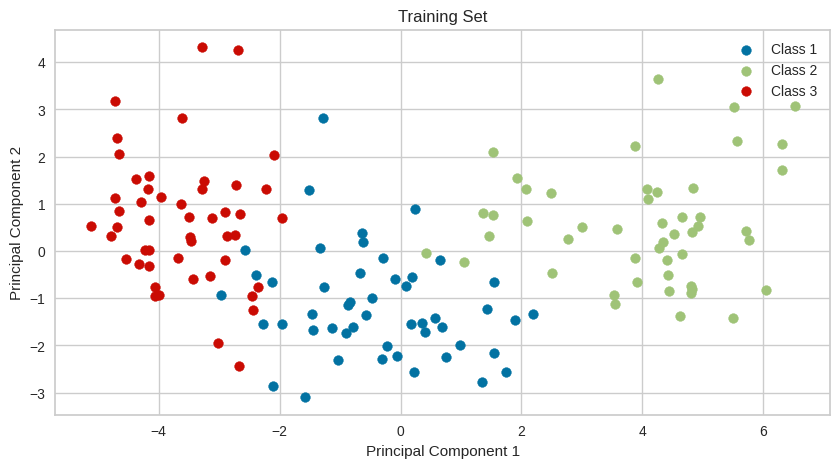

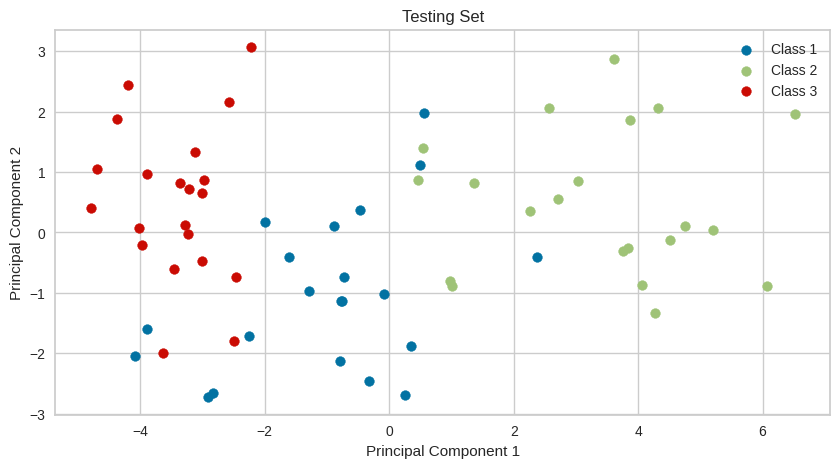

In [22]:
# 1.6
# Add necessary code here.

import matplotlib.pyplot as plt

# Function to create scatter plot with legend
def scatter_plot_with_legend(data, labels, title):
    plt.figure(figsize=(10, 5))
    for label in set(labels):
        plt.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Class {label}')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Scatter plots for training and testing sets
scatter_plot_with_legend(X_train_pca, y_train, 'Training Set')
scatter_plot_with_legend(X_test_pca, y_test, 'Testing Set')


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

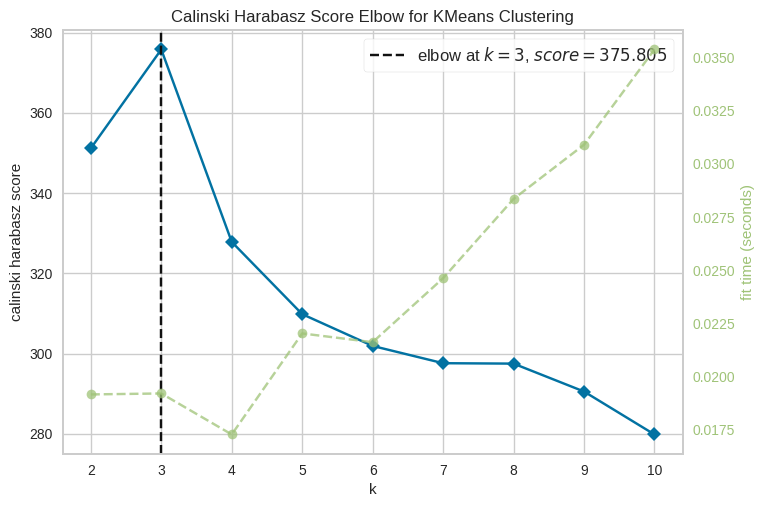

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [23]:
# 2.1
# Add necessary code here.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Constructing the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

# Define a range of possible values for k number of clusters
k_values = range(2, 11)

# Instantiate the KelbowVisualizer
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=k_values, metric='calinski_harabasz')

# Fit the visualizer to the scaled data
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1**

Based on the results of the KelbowVisualizer, it is clear that the optimal number of clusters for the dataset is 3. The elbow point observed in the plot at k=3 indicates a distinct change in the rate of decrease of the Calinski-Harabasz score, suggesting that adding more clusters beyond this point does not significantly improve the quality of the clustering solution. The Calinski-Harabasz score associated with the optimal number of clusters is 375.805 which reflects the compactness of the clusters and the separation between them. A higher score indicates better-defined clusters, implying that the data points are well-separated within each cluster while being distinctly different from points in other clusters. Therefore, based on the KelbowVisualizer, clustering the data into 3 clusters is likely to yield the most meaningful and interpretable grouping of data points.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [24]:
# 2.2
# Add necessary code here.

# Get the optimal number of k clusters
optimal_k = 3

# Constructing the pipeline with optimal number of clusters
pipeline_optimal = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, n_init=10))
])

# Fitting pipeline to training data
pipeline_optimal.fit(X_train)

# Labelling training data using the trained K-Means model
train_labels = pipeline_optimal.predict(X_train)


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [25]:
# 2.3
# Add necessary code here.

from sklearn.decomposition import PCA

# Initialize PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)

# Apply PCA to the dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

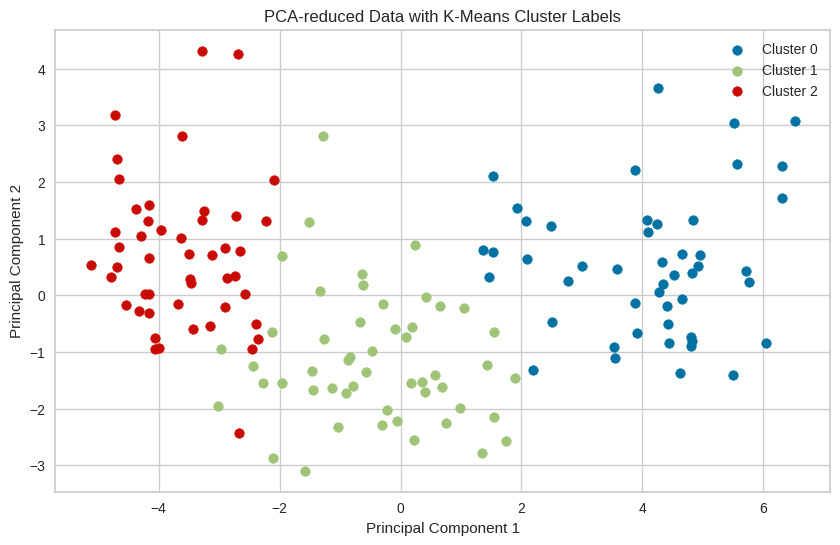

In [28]:
# 2.4
# Add necessary code here.

import matplotlib.pyplot as plt

# Plot the PCA-reduced data with K-Means cluster labels
plt.figure(figsize=(10, 6))
for label in range(optimal_k):
    plt.scatter(X_train_pca[train_labels == label, 0], X_train_pca[train_labels == label, 1], label=f'Cluster {label}')

plt.title('PCA-reduced Data with K-Means Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question**

Based on the 2D PCA plot from part 2.4, it can be seen that the clusters are well sperated for the most part. The clusters are pretty distinct. There is slight overlap between cluster 1 and 2 but cluster 2 and cluster 0 do not overlap. The distinction amongst the clusters indicates that the K means clustering algorithm succesfully partiioned the data into homogenous groups based on their features. The overlapping regions suggest shared charactersitics and similarities betweeen the data points belonging to different clusters. From the plot, cluster 2 has the most distributed data points, whereas the shape of cluster 1 is a bit more compact and together. Cluster 0 and cluster 1 seem to have some outliers (far from the rest of the data points/center of their cluster) which impacts overall cluster performance. Overall, the 2D PCA plot suggests that the K-Means algorithm was effective in partitioning the data into distinct clusters based on their features.